# **Targeting Childhood Obesity in London:**  
## *Spatio-Temporal Effects and Socioeconomic Moderators Informing Facility Interventions*  

-----
*CASA006 Coursewrok*

## Preparation

- [Github link](https://github.com/VeraLi0710/06DS-ML-Investigation)

- Number of words: 1870

- Runtime: 20 seconds (*Memory 10 GB, CPU Intel i7-10700 CPU @2.90GHz*)

- Coding environment: SDS Docker

- License: this notebook is made available under the [Creative Commons Attribution license](https://creativecommons.org/licenses/by/4.0/).

- Additional library *[libraries not included in SDS Docker or not used in this module]*:
    - **watermark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.
 
    - To install required package:  
        ```bash  
        !pip install linearmodels  
        ```
        ```bash
        !pip install nbconvert weasyprint  
        ```

---

## Table of contents

1. [Introduction](#Introduction)

2. [Literature Review](#Literature-Review)

1. [Research questions](#Research-questions)

1. [Data Collection](#Data)

1. [Methodology](#Methodology)

1. [Results Analysis](#Results-and-discussion)

1. [Discussion and Conclusion](#Conclusion)

1. [References](#References)

---

## 1.0 Introduction

[[ go back to the top ]](#Table-of-contents)

Childhood obesity remains a serious public health issue in London, harming children’s health and imposing substantial economic costs. In response, the UK government’s *Childhood Obesity: A Plan for Action* (Department of Health and Social Care, 2018 <a href="#doh-2018" style="text-decoration:none">(Department of Health and Social Care, 2018)</a>) significantly boosted investment in physical activity infrastructure, including schools and community sports facilities. Public Health England’s *Local Health Profiles* highlight increased access to parks, playgrounds, and sports centres across London wards ([Public Health England, 2023](#phe-2023)). However, reductions in childhood obesity have been limited and uneven, particularly among younger children, reflecting obesity’s complex causes and the limited impact of infrastructure expansion alone ([Wyszyńska et al., 2020](#wyszynska-2020); [Lieb, 2009](#lieb-2009)).  

This study quantitatively assesses how various facility types affect childhood obesity rates by age group in London wards from 2009/10 to 2013/14. It also explores the moderating effects of socioeconomic status (SES), greenspace, and public transport accessibility (PTAL). Employing spatial and temporal fixed effects, it aims to reveal spatial heterogeneity and develop an innovative risk-intervention quadrant framework combining spatial effects and residuals to support targeted, equitable public health strategies.  

### 1.1 Requirements to Run the Analysis  
 An overview of packages used to run the analysis with brief explanation of their role.

In [107]:
!pip install linearmodels  
!pip install nbconvert weasyprint  

In [160]:
import os  
import requests  
import zipfile  
from functools import reduce  

import pandas as pd  
import geopandas as gpd  
from shapely.geometry import Point  

import numpy as np  
import scipy.stats as stats  

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  
import matplotlib.cm as cm  
import matplotlib.colors as mcolors   
from matplotlib.gridspec import GridSpec  

import seaborn as sns  

from sklearn.ensemble import RandomForestRegressor  
from sklearn.preprocessing import StandardScaler  

import statsmodels.api as sm  
import statsmodels.formula.api as smf  
from statsmodels.iolib.summary2 import summary_col  
from statsmodels.stats.outliers_influence import variance_inflation_factor  

from linearmodels.panel import PanelOLS  

import nbformat  
import nbconvert  
from nbconvert.exporters import HTMLExporter  
from nbconvert.preprocessors import Preprocessor  
from weasyprint import HTML, CSS

In [109]:
import warnings  
from linearmodels.panel.model import MissingValueWarning  
 
warnings.filterwarnings("ignore", category=MissingValueWarning) 

## 2.0 Literature Review

[[ go back to the top ]](#Table-of-contents)

Increasing evidence challenges the notion that expanding physical activity facilities alone suffices to reduce childhood obesity rates. While infrastructure is necessary, obesity results from complex interactions among behaviours, socioeconomic factors, and environmental contexts ([Danielli et al., 2021](#danielli-2021)). Research shows age influences intervention responses: older children engage more independently with their surroundings, whereas younger children's behaviours are more shaped by familial and cultural factors ([Wyszyńska et al., 2020](#wyszynska-2020), indicating the need for age-specific approaches.  

Socioeconomic disparities exacerbate risk, as children from lower SES backgrounds often face poor access to quality facilities and supportive environments ([Lieb et al., 2009](#lieb-2009); [Yuan, 2024](#yuan-2024)). Environmental factors such as green space and public transport accessibility further modify physical activity opportunities and obesity outcomes ([Danielli et al., 2021](#danielli-2021)). Additionally, spatial heterogeneity within London wards manifests uneven obesity prevalence and resources, warranting geographically targeted interventions ([Titis et al., 2023](#titis-2023)).  

Notably, [Nau et al. (2019)](#nau-2019) used panel data integrating socioeconomic and built environment factors to study youth BMI trajectories across diverse communities, emphasizing the importance of accounting for spatial and temporal heterogeneity and dynamic interactions over time in obesity research.

Building on these foundations, the present study integrates facility types, age groups, SES, and environmental factors within a spatial-temporal fixed effects framework. This approach aims to better capture how facility impacts vary by age and SES while precisely modeling spatial heterogeneity in childhood obesity patterns, thereby informing more nuanced, targeted interventions.

## 3.0 Research questions

[[ go back to the top ]](#Table-of-contents)

Building on the above, and given that facility effects vary by children’s development and socioeconomic access, while environmental factors (SES, greenspace, PTAL) may modify these effects through space and time, this study addresses:

- **RQ1 |** How do different facility types affect childhood obesity across age and socioeconomic groups, after accounting for spatial and temporal factors?

- **RQ2 |** How do greenspace and public transport accessibility modify the effects of facilities on obesity?

Recognizing that obesity prevalence and environmental influences vary across geographic areas and over time, a comprehensive spatial-temporal analysis is necessary. Consequently:  

- **RQ3 |** How can spatial and temporal fixed effects reveal heterogeneous patterns to inform targeted public health interventions?


## 4.0 Data Collection

[[ go back to the top ]](#Table-of-contents)

This study focuses on London wards at the 2011 level ([London Data Store, 2011](#lds-boundary)), offering the finest publicly available spatial resolution. The research covers the academic years from 2010/2011 to 2013/2014, spanning four academic years in total.  

Extracting zip file…
Shapefile extracted at: data/London-wards-2014/London-wards-2014 (1)/London-wards-2014_ESRI/London_Ward.shp
Loading the shapefile...
                     NAME   GSS_CODE  HECTARES  NONLD_AREA  LB_GSS_CD  \
0       Chessington South  E05000405   755.173         0.0  E09000021   
1  Tolworth and Hook Rise  E05000414   259.464         0.0  E09000021   
2              Berrylands  E05000401   145.390         0.0  E09000021   
3               Alexandra  E05000400   268.506         0.0  E09000021   
4                Beverley  E05000402   187.821         0.0  E09000021   

                BOROUGH  POLY_ID  \
0  Kingston upon Thames    50840   
1  Kingston upon Thames   117160   
2  Kingston upon Thames    50449   
3  Kingston upon Thames    50456   
4  Kingston upon Thames   117161   

                                            geometry  
0  POLYGON ((516401.6 160201.8, 516407.3 160210.5...  
1  POLYGON ((517829.6 165447.1, 517837.1 165469.4...  
2  POLYGON ((518107.5 167

/tmp/ipykernel_106/711259404.py:57: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  facilities = pd.read_csv('data/GIS_Active_Places_Power_Facility_2339094778124018571.csv')
/tmp/ipykernel_106/711259404.py:73: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  facilities['closed_date'] = pd.to_datetime(facilities['closed_date'], errors='coerce')
/tmp/ipykernel_106/711259404.py:89: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...

  gdf_fac_london = gpd.sjoin(gdf_fac, wards, predicate='within', how='inner')


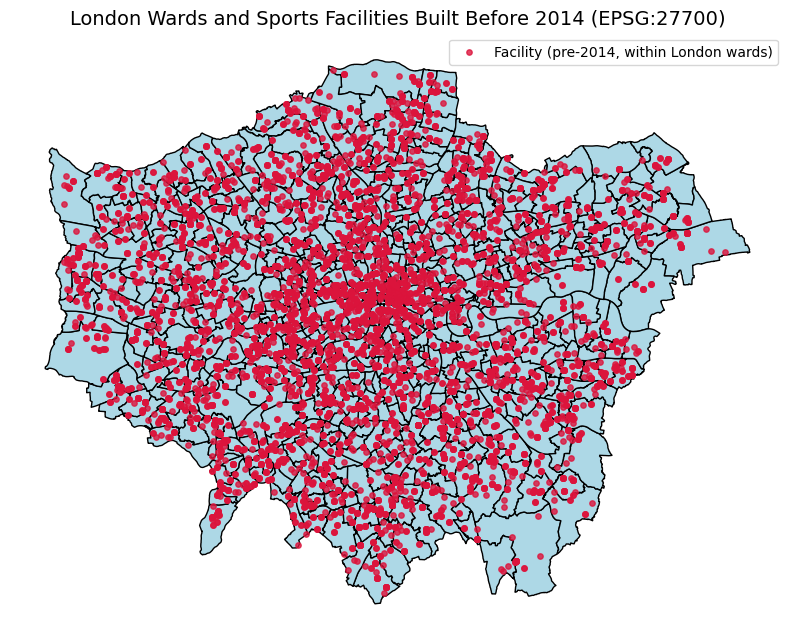

In [110]:
# 3.1 Import London-ward shapefile
url = "https://data.london.gov.uk/download/statistical-gis-boundary-files-london/b381c92b-9120-45c6-b97e-0f7adc567dd2/London-wards-2014.zip"  
zip_path = "data/London-wards-2014.zip"  
extract_dir = "data/London-wards-2014"  

os.makedirs("data", exist_ok=True)  

# Download ZIP if necessary  
if not os.path.exists(zip_path):  
    print("Downloading zip file…")  
    resp = requests.get(url)  
    with open(zip_path, "wb") as f:  
        f.write(resp.content)  
else:  
    print("Zip file already exists. Skipping download.")  

# Extract ZIP if shapefile not already present  
need_extract = True  
if os.path.exists(extract_dir):  
    # Search for .shp file recursively  
    for root, dirs, files in os.walk(extract_dir):  
        for f in files:  
            if f.lower() == "london_ward.shp":  
                shp_path = os.path.join(root, f)  
                need_extract = False  
                print(f"Found existing shapefile at: {shp_path}")  
                break  
        if not need_extract:  
            break  

if need_extract:  
    print("Extracting zip file…")  
    with zipfile.ZipFile(zip_path, "r") as zip_ref:  
        zip_ref.extractall(extract_dir)  
    # Find .shp after extraction  
    shp_path = None  
    for root, dirs, files in os.walk(extract_dir):  
        for f in files:  
            if f.lower() == "london_ward.shp":  
                shp_path = os.path.join(root, f)  
                print(f"Shapefile extracted at: {shp_path}")  
                break  
        if shp_path:  
            break  
    if not shp_path:  
        raise FileNotFoundError("Shapefile not found after extraction!")  
else:  
    print(f"Shapefile already extracted at: {shp_path}")  

# Load shapefile with geopandas  
print("Loading the shapefile...")  
wards = gpd.read_file(shp_path)  
print(wards.head())  


# 3.2.1 Import and caculate Facilities data
facilities = pd.read_csv('data/GIS_Active_Places_Power_Facility_2339094778124018571.csv')  
facilities = facilities.rename(columns={  
    'Accessibility Type Group (Text)': 'access_group',  
    'Management Type Group (Text)': 'mgmt_group',  
    'Facility Type': 'facility_type',  
    'Year Built': 'year_built',  
    'Closed Date': 'closed_date',  
    'Latitude': 'lat',  
    'Longitude': 'lon'  
})  

# Select relevant columns  
facilities = facilities[['lat', 'lon', 'year_built', 'access_group', 'mgmt_group', 'facility_type', 'closed_date']]  

# Type conversion for filtering  
facilities['year_built'] = pd.to_numeric(facilities['year_built'], errors='coerce')  
facilities['closed_date'] = pd.to_datetime(facilities['closed_date'], errors='coerce')  

# Filter: built before 2014 and (not closed or closed in/after 2014)  
mask = (facilities['year_built'] < 2014) & (  
    facilities['closed_date'].isna() | (facilities['closed_date'].dt.year >= 2014)  
)  
facilities = facilities[mask]  

# Convert to GeoDataFrame (WGS84)  
geometry = [Point(xy) for xy in zip(facilities['lon'], facilities['lat'])]  
gdf_fac = gpd.GeoDataFrame(facilities, geometry=geometry, crs="EPSG:4326")  

# Reproject to EPSG:27700 to match wards  
gdf_fac = gdf_fac.to_crs(epsg=27700)  

# Clip facility points to London wards boundary (keep only points within wards)  
gdf_fac_london = gpd.sjoin(gdf_fac, wards, predicate='within', how='inner')  

# Plot: overlay points on wards map  
fig, ax = plt.subplots(figsize=(10, 10))  
wards.plot(ax=ax, color="lightblue", edgecolor="black")  
gdf_fac_london.plot(  
    ax=ax, color="crimson", markersize=15, label="Facility (pre-2014, within London wards)", alpha=0.8  
)  
ax.set_title("London Wards and Sports Facilities Built Before 2014 (EPSG:27700)", fontsize=14)  
ax.axis('off')  
plt.legend()  
plt.show()  


#3.2.2 Caculate Facilities per 10000 pop by wards
# Calculate Facilities per 10,000 Population by Wards  
years, pop_years = range(2010, 2015), [2011, 2012, 2013, 2014]  
facility_types = ['Education', 'Commercial', 'Local Authority']  
ward_cols = ['NAME', 'GSS_CODE', 'BOROUGH', 'geometry']  

**Table 3.1:** Variable Descriptions and Data Sources for Urban Childhood Obesity Analysis

| Variable Category | Variable Name | Description | Time Coverage | Data Source |  
|:-----------------|:--------------|:------------|:-------------|:------------|  
| **Obesity Rates** | `obese_recp` | Reception children obesity (ages 4-5) | 2010/2011–2013/2014 | [Ward Atlas-NCMP](#ward-profiles-atlas) |  
| | `obese_y6` | Year 6 children obesity (ages 10-11) | 2010/2011–2013/2014 | [Ward Atlas-NCMP](#ward-profiles-atlas) |  
| **Facility Types** | `facility_edu` | Education facilities per 10,000 pop | 2010–2014 | [Active Places](#active-places-power), [ONS](#ons-pop) |  
| | `facility_comm` | Commercial facilities per 10,000 pop | 2010–2014 | [Active Places](#active-places-power), [ONS](#ons-pop) |  
| | `facility_local` | Local authority facilities per 10,000 pop | 2010–2014 | [Active Places](#active-places-power), [ONS](#ons-pop) |  
| **Socioeconomic** | `unemp` | Unemployment rate | 2010–2014 | [Ward Profiles](#ward-profiles-atlas) |  
| **Environmental** | `greenspace_pct` | Percentage of greenspace | 2010, 2012* | [Ward Profiles](#ward-profiles-atlas) |  
| | `ptal` | Public Transport Accessibility Level | 2010, 2011, 2012, 2014* | [Ward Profiles](#ward-profiles-atlas) |  

*[Note: Missing years for greenspace and PTAL were estimated via interpolation as described below.]*

Based on prior literature and clear policy interventions targeting childhood obesity, this study focuses on the densities of physical activity facilities as key independent variables, with children’s age groups and the proportion from unemployed households serving as heterogeneity stratifiers. Greenspace coverage and public transport accessibility (PTAL) are included as control variables.

- Facilities were filtered to include only those operational before 2014 by considering their opening and closing dates. Population estimates for wards each year were taken from the Office for National Statistics ([ONS, 2023](#ons-pop)). Facility density per 10,000 population was calculated using the formula:  
<div style="text-align:center; padding:10px 0;">  
  <span style="font-family: 'Times New Roman', serif; font-size:1.1em; font-weight:bold;">  
    Facility density = (Number of operational facilities in ward &#x2215; Ward population) &times; 10,000  
  </span>  
</div>  

   This calculation standardises facility counts by population size, enabling meaningful comparison across wards with differing population numbers.  

In [111]:
# Count active facilities per ward per year  
def count_facilities_by_ward(gdf_fac_london, years, facility_types):  
    wards_fac_count = wards[ward_cols].copy()  
    for yr in years:  
        # Filter active facilities for the year  
        mask_active = (  
            (gdf_fac_london['year_built'] <= yr) &   
            (gdf_fac_london['closed_date'].isna() | (gdf_fac_london['closed_date'].dt.year >= yr))  
        )  
        active = gdf_fac_london[mask_active]  
        
        # Count facilities by type for each ward  
        for ftype in facility_types:  
            temp = active[active['mgmt_group'] == ftype]  
            by_ward = temp.groupby('GSS_CODE').size().rename(f'facility_{ftype.lower()}_{yr}').reset_index()  
            wards_fac_count = wards_fac_count.merge(by_ward, on='GSS_CODE', how='left')  
    
    # Fill missing values with 0  
    for ftype in facility_types:  
        for yr in years:  
            col = f'facility_{ftype.lower()}_{yr}'  
            if col in wards_fac_count.columns:  
                wards_fac_count[col] = wards_fac_count[col].fillna(0)  
    
    return wards_fac_count  

In [112]:
# Load and process population data  
def load_population_data(pop_years):  
    pop_files = [  
        'data/London_Population_wards/mid_2011_ward_2011_quinary.csv',  
        'data/London_Population_wards/SAPE20DT8-mid-2012-ward-2017-syoa-estimates-unformatted.csv',  
        'data/London_Population_wards/SAPE20DT8-mid-2013-ward-2017-syoa-estimates-unformatted.csv',  
        'data/London_Population_wards/SAPE20DT8-mid-2014-ward-2017-syoa-estimates-unformatted.csv'  
    ]  
    
    pop_dfs = []  
    for file, year in zip(pop_files, pop_years):  
        df = pd.read_csv(file, low_memory=False)  
        col_map = {'Ward Code': 'GSS_CODE', 'All Ages': f'pop_{year}'}  
        df = df[list(col_map.keys())].rename(columns=col_map)  
        df[f'pop_{year}'] = pd.to_numeric(df[f'pop_{year}'].astype(str).str.replace(',', ''), errors='coerce')  
        pop_dfs.append(df)  
    
    return reduce(lambda left, right: pd.merge(left, right, on='GSS_CODE', how='outer'), pop_dfs)  

In [113]:
# Compute facility density per 10,000 population  
def compute_facility_density(wards_fac_count, df_pop, pop_years, facility_types, ward_cols):  
    wards_fac_pop = wards_fac_count.merge(df_pop, on='GSS_CODE', how='left')  
    
    for yr in pop_years:  
        for ftype in facility_types:  
            fac_col = f'facility_{ftype.lower()}_{yr}'  
            wards_fac_pop[f'facility_{ftype.lower()}_per_10000pop_{yr}'] = (  
                wards_fac_pop[fac_col] / wards_fac_pop[f'pop_{yr}'] * 10000  
            )  
    
    to_keep = ward_cols.copy()  
    for yr in pop_years:  
        for ftype in facility_types:  
            to_keep.append(f'facility_{ftype.lower()}_per_10000pop_{yr}')  
    
    return wards_fac_pop[to_keep]  

# Main execution  
wards_fac_count = count_facilities_by_ward(gdf_fac_london, years, facility_types)  
df_pop = load_population_data(pop_years)  
wards_fac_pop = compute_facility_density(wards_fac_count, df_pop, pop_years, facility_types, ward_cols)  

In [114]:
# 3.3 Import Obseity data
# 1. Read childhood obesity CSV, skipping first 2 rows
df_obesity = pd.read_csv('data/Childhood_obesity_2008-09_2013-14.csv', skiprows=2)  

# 2. Clean and clarify column names for age and survey period  
rename_dict = {  
    'New Code': 'GSS_CODE',  
    'Borough': 'BOROUGH',  
    'Names': 'NAME',  
    # Reception (age 4-5)  
    '2008/09 to 2010/11: % obese':  'obese_recp_2008_2011',  
    '2009/10 to 2011/12: % obese':  'obese_recp_2009_2012',  
    '2010/11 to 2012/13: % obese':  'obese_recp_2010_2013',  
    '2011/12 to 2013/14: % obese':  'obese_recp_2011_2014',  
    # Year 6 (age 10-11)  
    '2008/09 to 2010/11: % obese.1': 'obese_y6_2008_2011',  
    '2009/10 to 2011/12: % obese.1': 'obese_y6_2009_2012',  
    '2010/11 to 2012/13: % obese.1': 'obese_y6_2010_2013',  
    '2011/12 to 2013/14: % obese.1': 'obese_y6_2011_2014',  
}  
df_obesity = df_obesity.rename(columns=rename_dict)  

# 3. Only keep relevant columns  
keep_cols = ['GSS_CODE', 'BOROUGH', 'NAME',  
             'obese_recp_2008_2011', 'obese_recp_2009_2012',   
             'obese_recp_2010_2013', 'obese_recp_2011_2014',  
             'obese_y6_2008_2011', 'obese_y6_2009_2012',  
             'obese_y6_2010_2013', 'obese_y6_2011_2014']  
df_obesity = df_obesity[keep_cols]  

# 4. Convert percentage columns to numeric (handles 'n/a' as NaN)  
for col in keep_cols[3:]:  
    df_obesity[col] = pd.to_numeric(df_obesity[col], errors='coerce')  

# 5. Choose target columns from main (facility/population) DataFrame  
final_fac_cols = [  
    'NAME', 'GSS_CODE', 'BOROUGH', 'geometry',  
    'facility_education_per_10000pop_2011', 'facility_education_per_10000pop_2012',  
    'facility_education_per_10000pop_2013', 'facility_education_per_10000pop_2014',  
    'facility_commercial_per_10000pop_2011', 'facility_commercial_per_10000pop_2012',  
    'facility_commercial_per_10000pop_2013', 'facility_commercial_per_10000pop_2014',  
    'facility_local authority_per_10000pop_2011', 'facility_local authority_per_10000pop_2012',  
    'facility_local authority_per_10000pop_2013', 'facility_local authority_per_10000pop_2014'  
]  
# 6. Merge with main DataFrame to create a master table  
wards_master_df = wards_fac_pop[final_fac_cols].merge(  
    df_obesity, on=['GSS_CODE', 'BOROUGH', 'NAME'], how='left'  
)  


#3.4 Import Uemp, green space, ptal data
# Read unemployment data and convert to numeric  
unemp = pd.read_csv("data/out-of-work-family-2010_2014.csv", skiprows=1, usecols=["New Code", "2010", "2011", "2012", "2013", "2014"])  
unemp = unemp.rename(columns={col: f"unemp_{col}" for col in unemp.columns if col != "New Code"})  
unemp = unemp.rename(columns={"New Code": "GSS_CODE"})  
unemp[unemp.columns[1:]] = unemp[unemp.columns[1:]].apply(pd.to_numeric, errors='coerce')  

# Read greenspace and PTAL data  
df_green_ptal = pd.read_csv("data/wards_greenspace_2010_2014.csv", skiprows=1)  

# Extract and process greenspace data  
df_green = df_green_ptal[["New Code", "2012", "2014"]].rename(columns={  
    "New Code": "GSS_CODE", "2012": "greenspace_pct_2012", "2014": "greenspace_pct_2014"  
})  
df_green[["greenspace_pct_2012", "greenspace_pct_2014"]] = df_green[["greenspace_pct_2012", "greenspace_pct_2014"]].apply(pd.to_numeric, errors='coerce')  

# Extract and process PTAL data  
ptal_years = df_green_ptal.columns[df_green_ptal.columns.get_loc("2012")+2:df_green_ptal.columns.get_loc("2012")+6]  
df_ptal = df_green_ptal[["New Code"] + list(ptal_years)].rename(columns={  
    "New Code": "GSS_CODE",   
    ptal_years[0]: "ptal_2010",   
    ptal_years[1]: "ptal_2011",   
    ptal_years[2]: "ptal_2012",   
    ptal_years[3]: "ptal_2014"  
})  
df_ptal[["ptal_2010", "ptal_2011", "ptal_2012", "ptal_2014"]] = df_ptal[["ptal_2010", "ptal_2011", "ptal_2012", "ptal_2014"]].apply(pd.to_numeric, errors='coerce')  

- Linear interpolation was used to fill missing years in greenspace and PTAL data. The method assumes changes between observed values occur steadily over time, estimating missing data via weighted averages of neighbouring points.

    This approach is reliable since environmental variables like greenspace and PTAL typically change gradually over short periods, and the one- to two-year interpolation span minimises inaccuracies. Linear interpolation is a well-established technique in spatio-temporal analysis, as noted in comprehensive reviews such as [Li et al., 2014](#li-2014).  

In [115]:
# Interpolate missing years  
df_green["greenspace_pct_2011"] = df_green["greenspace_pct_2012"]  
df_green["greenspace_pct_2013"] = (df_green["greenspace_pct_2012"] + df_green["greenspace_pct_2014"]) / 2  
df_ptal["ptal_2013"] = (df_ptal["ptal_2012"] + df_ptal["ptal_2014"]) / 2  


After cleaning and interpolation, all datasets were merged on the standard geographic identifier (ward_code) to produce a comprehensive dataset for analysis.


In [116]:
# Merge data into master DataFrame  
wards_master_df = wards_master_df.merge(unemp, on="GSS_CODE", how="left")  
wards_master_df = wards_master_df.merge(df_green[["GSS_CODE",   
    "greenspace_pct_2011", "greenspace_pct_2012", "greenspace_pct_2013", "greenspace_pct_2014"]],   
    on="GSS_CODE", how="left")  
wards_master_df = wards_master_df.merge(df_ptal[["GSS_CODE",   
    "ptal_2010", "ptal_2011", "ptal_2012", "ptal_2013", "ptal_2014"]],   
    on="GSS_CODE", how="left")  
# Preview merged result  
print(wards_master_df.info()) 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   NAME                                        654 non-null    object  
 1   GSS_CODE                                    654 non-null    object  
 2   BOROUGH                                     654 non-null    object  
 3   geometry                                    654 non-null    geometry
 4   facility_education_per_10000pop_2011        570 non-null    float64 
 5   facility_education_per_10000pop_2012        637 non-null    float64 
 6   facility_education_per_10000pop_2013        637 non-null    float64 
 7   facility_education_per_10000pop_2014        637 non-null    float64 
 8   facility_commercial_per_10000pop_2011       570 non-null    float64 
 9   facility_commercial_per_10000pop_2012       637 non-null    float64 

In [117]:
# Data preparation  
education_cols = [  
    'facility_education_per_10000pop_2011',  
    'facility_education_per_10000pop_2012',  
    'facility_education_per_10000pop_2013',  
    'facility_education_per_10000pop_2014'  
]  

obesity_cols = [  
    'obese_recp_2008_2011',  
    'obese_recp_2009_2012',  
    'obese_recp_2010_2013',  
    'obese_recp_2011_2014',  
]  

plot_df = wards_master_df.copy()  
plot_df['facility_education'] = plot_df[education_cols].mean(axis=1)  
plot_df['obesity'] = plot_df[obesity_cols].mean(axis=1)  
plot_df['age_group'] = np.where(plot_df['obesity'] > plot_df['obesity'].median(), 'Year6', 'Reception')  

plot_df = plot_df[['facility_education', 'obesity', 'age_group']].dropna()  
plot_df = plot_df[  
    (plot_df['facility_education'].between(0, 30)) &   
    (plot_df['obesity'].between(0, 25))  
]  

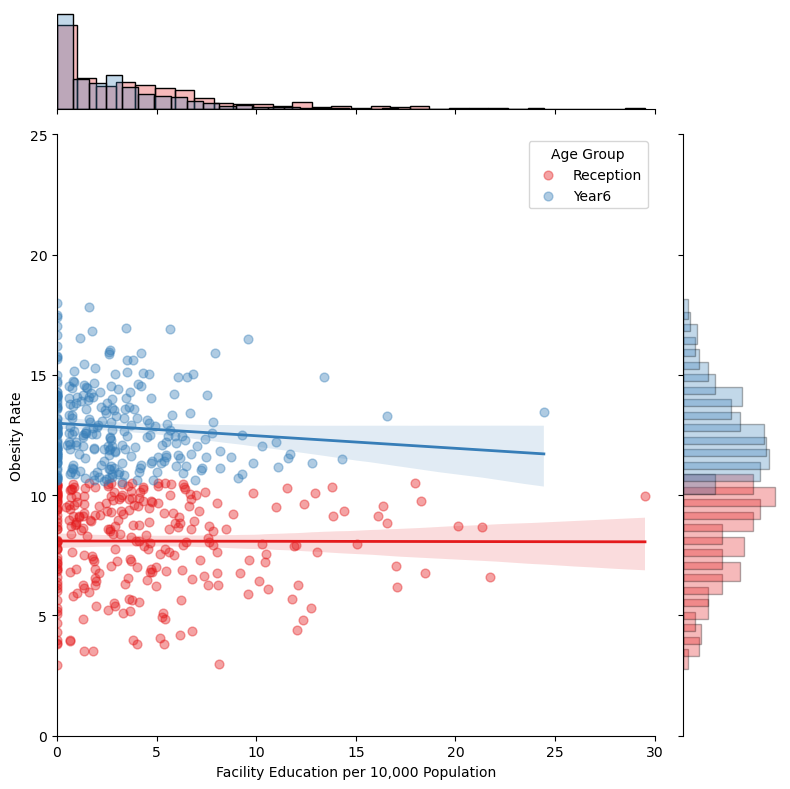

In [118]:
# Plotting: scatter with marginal histograms  
g = sns.JointGrid(data=plot_df, x='facility_education', y='obesity', height=8)  
palette = sns.color_palette("Set1", 2)  
groups = plot_df['age_group'].unique()  

for i, group in enumerate(groups):  
    subset = plot_df[plot_df['age_group'] == group]  
    sns.regplot(x='facility_education', y='obesity', data=subset, scatter=True, fit_reg=True,  
                scatter_kws={'alpha':0.4, 's':40, 'color':palette[i]},  
                line_kws={'color':palette[i], 'linewidth':2}, ax=g.ax_joint, label=group)  
    sns.histplot(subset['facility_education'], color=palette[i], alpha=0.3, bins=30, ax=g.ax_marg_x)  

# Horizontal bar for obesity distribution on right margin  
bin_edges = np.linspace(plot_df['obesity'].min(), plot_df['obesity'].max(), 30)  
for i, group in enumerate(groups):  
    subset = plot_df[plot_df['age_group'] == group]  
    counts, _ = np.histogram(subset['obesity'], bins=bin_edges)  
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])  
    g.ax_marg_y.barh(bin_centers, counts, color=palette[i], alpha=0.3, edgecolor='black')  

g.ax_joint.set_xlim(0, 30)  
g.ax_joint.set_ylim(0, 25)  
g.ax_marg_y.set_ylim(g.ax_joint.get_ylim())  
g.ax_joint.legend(title='Age Group')  
g.set_axis_labels('Facility Education per 10,000 Population', 'Obesity Rate')  

plt.tight_layout()  
plt.show()  

<div style="text-align:center; padding:10px 0;">  
  <strong>Figure 1:</strong> Distribution and relationship between education facility density and childhood obesity rates by age group.  
</div>  

I preliminarily visualizes the relationship between education facility density and childhood obesity rates by age group, As shown in Figure 1 Year 6 children exhibit higher obesity rates, alongside noticeable variation in facility density among wards.

## 5. Methodology

[[ go back to the top ]](#Table-of-contents)

Following [Nau et al. (2019)](#nau-2019), this study analyses childhood obesity in London wards from 2010 to 2014 using panel data integrating socioeconomic and built environment variables. We develop age-specific fixed effects regression models at the ward level, incorporating detailed facility types, age groups (Reception and Year 6), and their interactions with socioeconomic status (SES). This approach controls spatial and temporal heterogeneity while accounting for residual variation and spatial risk (see [Figure 2](#figure-2)).  

### 5.1 Multicollinearity Testing  

Multicollinearity is first assessed using Variance Inflation Factor (VIF) and Pearson correlation matrix to avoid high correlations among independent variables that may bias model estimation ([Hair et al., 2019](#hair-2019)):  
    - Variables with VIF > 5 are removed or transformed.
    - Variables with absolute Pearson correlation > 0.7 are excluded.
    
This ensures stable and interpretable panel regression models.

### 5.2 Cross-sectional OLS Regression

To assess baseline spatial associations between childhood obesity and variables, I conduct annual cross-sectional Ordinary Least Squares (OLS) regressions—a standard method estimating linear relationships. Treating years independently captures spatial variation but omits time-invariant unobserved factors.  

This approach informs variable selection and model setup for panel fixed effects models addressing temporal dynamics and heterogeneity.

### 5.3 Panel Fixed Effects Regression Model  

Using the screened variables, a panel fixed effects regression on ward-level data (2010–2014) analyses spatial and temporal childhood obesity variations. This model controls for time-invariant regional characteristics and common year effects, reducing omitted variable bias and enhancing causal inference. 

The baseline model is specified as:  

<div style="text-align:center; padding:10px 0;">  
<span style="font-family: 'Times New Roman', serif; font-size: 1.1em; font-weight: bold;">  
Obesity<sub>i,t</sub> = α + ∑<sub>k</sub> β<sub>k</sub> Facility<sub>k,i,t</sub> + γ₁ Unemp<sub>i,t</sub> + γ₂ Green<sub>i,t</sub> + γ₃ PTAL<sub>i,t</sub> + μ<sub>i</sub> + τ<sub>t</sub> + ε<sub>i,t</sub>  
</span>  
</div>  

where:  

- <span style="font-family: 'Times New Roman', serif;">Obesity<sub>i,t</sub></span>: childhood obesity rate in ward <span style="font-family: 'Times New Roman', serif;">i</span> at year <span style="font-family: 'Times New Roman', serif;">t</span>  
- <span style="font-family: 'Times New Roman', serif;">Facility<sub>k,i,t</sub></span>: density of facility type <span style="font-family: 'Times New Roman', serif;">k</span> in ward <span style="font-family: 'Times New Roman', serif;">i</span> at year <span style="font-family: 'Times New Roman', serif;">t</span>  
- <span style="font-family: 'Times New Roman', serif;">Unemp<sub>i,t</sub></span>, <span style="font-family: 'Times New Roman', serif;">Green<sub>i,t</sub></span>, <span style="font-family: 'Times New Roman', serif;">PTAL<sub>i,t</sub></span>: controls for unemployment, greenspace, and public transport accessibility  
- <span style="font-family: 'Times New Roman', serif;">μ<sub>i</sub></span>: ward fixed effects (time-invariant factors)  
- <span style="font-family: 'Times New Roman', serif;">τ<sub>t</sub></span>: year fixed effects (common temporal shocks)  
- <span style="font-family: 'Times New Roman', serif;">ε<sub>i,t</sub></span>: error term  

Models are fitted separately for Reception (4–5 years) and Year 6 (10–11 years) to capture developmental differences.  

Interaction terms between facilities and socioeconomic status (SES) are added:  

<div style="text-align:center; padding:10px 0;">  
<span style="font-family: 'Times New Roman', serif; font-size: 1.1em; font-weight: bold;">  
Obesity<sub>i,t</sub> = α + ∑<sub>k</sub> β<sub>k</sub> Facility<sub>k,i,t</sub> + ∑<sub>k</sub> δ<sub>k</sub>(Facility<sub>k,i,t</sub> × SES<sub>i,t</sub>) + γ₁ Unemp<sub>i,t</sub> + γ₂ Green<subF>i,t</sub> + γ₃ PTAL<sub>i,t</sub> + μ<sub>i</sub> + τ<sub>t</sub> + ε<sub>i,t</sub>  
</span>  
</div>  

which explores how SES moderates the impact of different facility types on childhood obesity, enhancing the policy relevance and scientific rigour of recommendations.  

### 5.4 Residuals and Spatial Heterogeneity Analysis  

Inspired by approaches combining spatial risk assessment with local variation analysis ([Walker et al., 2016](#walker-et-al-2016)), I leverage spatial fixed effects and residuals to capture inherent ward-level risk and unexplained deviations amid current interventions. I then classify wards in a two-dimensional quadrant plot by spatial risk and residual sign:

This classification identifies:  

- **High spatial risk & positive residuals**: Persistent hotspots where obesity exceeds expectations, indicating insufficient intervention.
- **High spatial risk & negative residuals**: High-risk wards with better-than-expected outcomes, reflecting effective local measures.
- **Low spatial risk & positive residuals**: Typically low-risk wards showing rising obesity, signaling emerging issues.
- **Low spatial risk & negative residuals**: Wards with low risk and favourable outcomes, representing stable, well-managed areas.  

By combining spatial risk and residual deviations, this approach highlights where current strategies succeed or fail, guiding more precise resource allocation and multi-level public health actions.  
<a id="figure-2"></a>  
![Methodology flow chart](plots/methodology-flow-chart.png)  

<div style="text-align:center; padding:10px 0;">  
  <strong>Figure 2:</strong> Methodology flow chart.
</div>  

## 6.0 Results Analysis

[[ go back to the top ]](#Table-of-contents)

### 6.1 Multicollinearity Check
Table [2](#table-2-vif) and Figure [3](#figure-3-correlation-matrix) indicate all explanatory variables have acceptable multicollinearity (VIF < 5). Facility variables show moderate correlations (up to 0.35), while socioeconomic and environmental variables display expected patterns, justifying their inclusion in regression models. 

In [119]:
# Define years and obesity columns per age group  
years = [2011, 2012, 2013, 2014]  
obesity_cols = {  
    'Reception': [f'obese_recp_{y-3}_{y}' for y in years],  
    'Year6': [f'obese_y6_{y-3}_{y}' for y in years],  
}  

# Panel variables of interest (facility and controls)  
panel_vars = [  
    'facility_education_per_10000pop_2011', 'facility_education_per_10000pop_2012',  
    'facility_education_per_10000pop_2013', 'facility_education_per_10000pop_2014',  
    'facility_commercial_per_10000pop_2011', 'facility_commercial_per_10000pop_2012',  
    'facility_commercial_per_10000pop_2013', 'facility_commercial_per_10000pop_2014',  
    'facility_local authority_per_10000pop_2011', 'facility_local authority_per_10000pop_2012',  
    'facility_local authority_per_10000pop_2013', 'facility_local authority_per_10000pop_2014',  
    'unemp_2011', 'unemp_2012', 'unemp_2013', 'unemp_2014',  
    'greenspace_pct_2011', 'greenspace_pct_2012', 'greenspace_pct_2013', 'greenspace_pct_2014',  
    'ptal_2011', 'ptal_2012', 'ptal_2013', 'ptal_2014'  
]  

# Prepare combined dataframe for VIF and correlation analysis  
data_all = pd.DataFrame()  

for group, cols in obesity_cols.items():  
    temp_df = pd.DataFrame()  
    for i, obesity_col in enumerate(cols):  
        year = years[i]  
        subset = wards_master_df[[  
            f'facility_education_per_10000pop_{year}',  
            f'facility_commercial_per_10000pop_{year}',  
            f'facility_local authority_per_10000pop_{year}',  
            f'unemp_{year}',  
            f'greenspace_pct_{year}',  
            f'ptal_{year}',  
            obesity_col  
        ]].copy()  
        # Rename columns for consistency  
        subset.columns = [  
            'facility_education', 'facility_commercial', 'facility_local_authority',  
            'unemployment', 'greenspace', 'ptal', 'obesity'  
        ]  
        subset['age_group'] = group  
        subset['year'] = year  
        temp_df = pd.concat([temp_df, subset], axis=0)  
    data_all = pd.concat([data_all, temp_df], axis=0)  

# Prepare dataset for VIF and correlation  
data_clean = data_all.dropna()  

<a id="table-2-vif"></a>  
<div style="text-align:center; padding:10px 0;">  
<strong>Table 2.</strong> Variance Inflation Factor (VIF) for Explanatory Variables  
</div>  

In [120]:
# Define features for VIF and correlation 
features = ['facility_education', 'facility_commercial', 'facility_local_authority', 'unemployment', 'greenspace', 'ptal']  

# Calculate VIF for multicollinearity check  
X = data_clean[features].values  
vif_data = pd.DataFrame({'Variable': features, 'VIF': [variance_inflation_factor(X, i) for i in range(X.shape[1])]})  
print(vif_data)  

                   Variable       VIF
0        facility_education  2.037713
1       facility_commercial  1.573460
2  facility_local_authority  1.449113
3              unemployment  3.592629
4                greenspace  3.324651
5                      ptal  4.200670


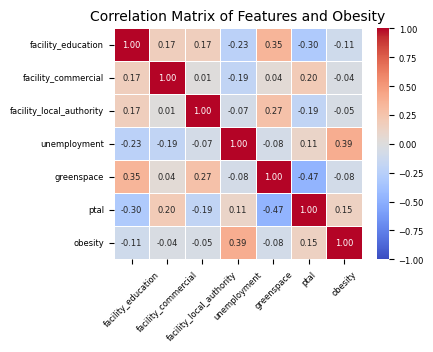

In [121]:
# Compute and plot correlation matrix including obesity  
corr_matrix = data_clean[features + ['obesity']].corr()  

plt.figure(figsize=(4, 3))  
sns.heatmap(  
    corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',  
    vmin=-1, vmax=1, linewidths=0.5, annot_kws={"size": 6}  
)  
plt.xticks(fontsize=6, rotation=45)  
plt.yticks(fontsize=6)  

colorbar = plt.gca().collections[0].colorbar  
colorbar.ax.tick_params(labelsize=6)  

plt.title("Correlation Matrix of Features and Obesity", fontsize=10)  
plt.show()  

<a id="figure-3-correlation-matrix"></a>  
<div style="text-align:center; padding:10px 0;">  
<strong>Figure 3.</strong> Correlation Matrix of Features and Obesity  
</div>  

Next, the dataset were reorganised into long format by concatenation and set with ward and year as panel indices for regression analysis.

In [175]:
# Create a panel ("long") DataFrame: one row per ward per year  
panel_list = []  

years = [2011, 2012, 2013, 2014]  

for year in years:  
    prev_3y = year - 3  
    
    # Build the column names for this year (using your column name convention)  
    recp_col = f'obese_recp_{prev_3y}_{year}'  
    y6_col = f'obese_y6_{prev_3y}_{year}'  
    fac_edu = f'facility_education_per_10000pop_{year}'  
    fac_com = f'facility_commercial_per_10000pop_{year}'  
    fac_loc = f'facility_local authority_per_10000pop_{year}'  
    unemp_col = f'unemp_{year}'  
    green_col = f'greenspace_pct_{year}'  
    ptal_col = f'ptal_{year}'  

    # Select & rename  
    temp = wards_master_df[['GSS_CODE', 'NAME', 'BOROUGH', 'geometry', fac_edu, fac_com, fac_loc, unemp_col, green_col, ptal_col, recp_col, y6_col]].copy()  
    temp.columns = ['ward_code', 'ward_name', 'borough','geometry',    
                    'facility_education', 'facility_commercial', 'facility_local_authority',  
                    'unemployment', 'greenspace_pct', 'ptal',  
                    'obesity_reception', 'obesity_year6']  
    temp['year'] = year  
    panel_list.append(temp)  

In [123]:
# Concatenate data for all years  
panel_df = pd.concat(panel_list, axis=0).reset_index(drop=True)  

# Set panel index for panel regression (ward_code and year)  
panel_df = panel_df.set_index(['ward_code', 'year'])  

### 6.2 OLS Regression Results  

Table [3](#table-3-cross-sectional-ols-results) presents cross-sectional OLS results for 2011–2014. Facility variables exhibit heterogeneity, with coefficients fluctuating between significant and nonsignificant across years; education-related facilities are borderline significant (~0.04). Public transport accessibility (ptal) consistently shows a positive and highly significant association with childhood obesity. Unemployment positively, and greenspace negatively, affect obesity rates significantly.  

Figure [4](#figure-4-facility-education-vs-obesity) highlights varied ward-level slopes between facility_education and Year 6 obesity, confirming heterogeneous facility effects.  
  

<a id="table-3-cross-sectional-ols-results"></a>  
<div style="text-align:center; padding:10px 0;">  
<strong>Table 3.</strong> Cross-Sectional OLS Regression Results (2011–2014)  
</div>  
<!-- OLS table content here -->  

In [124]:
panel_df_reset = panel_df.reset_index()  
models = []  
model_names = []  

for year in sorted(panel_df_reset['year'].unique()):  
    sub = panel_df_reset[panel_df_reset['year'] == year]  
    model = smf.ols("obesity_year6 ~ facility_education + facility_commercial + facility_local_authority + unemployment + greenspace_pct + ptal", data=sub).fit()  
    models.append(model)  
    model_names.append(str(year))  

table = summary_col(models, stars=True, model_names=model_names,  
                    info_dict={"N": lambda x: f"{int(x.nobs)}"},  
                    float_format="%.3f")  
print(table)  


                            2011      2012      2013      2014  
----------------------------------------------------------------
Intercept                12.759*** 13.216*** 13.480*** 14.293***
                         (0.729)   (0.754)   (0.723)   (0.739)  
facility_education       0.020     0.031     0.034     0.022    
                         (0.040)   (0.042)   (0.041)   (0.043)  
facility_commercial      0.046     0.054     0.058     0.034    
                         (0.045)   (0.046)   (0.044)   (0.046)  
facility_local_authority -0.056    -0.060    0.034     0.007    
                         (0.109)   (0.111)   (0.108)   (0.113)  
unemployment             0.007***  0.008***  0.009***  0.011*** 
                         (0.000)   (0.000)   (0.000)   (0.001)  
greenspace_pct           -0.006    -0.013    -0.010    -0.027** 
                         (0.010)   (0.010)   (0.010)   (0.011)  
ptal                     0.830***  0.770***  0.601***  0.546*** 
                        

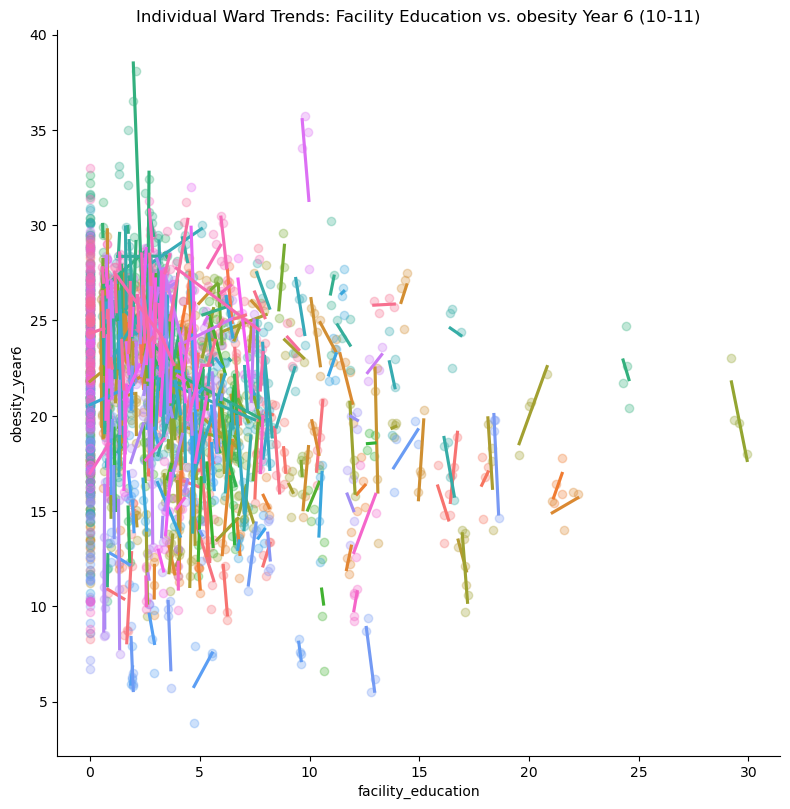

In [125]:
rec_vis = panel_df.reset_index().dropna(subset=['facility_education', 'obesity_year6'])  

sns.lmplot(data=rec_vis,   
           x='facility_education',   
           y='obesity_year6',   
           hue='ward_code', 
           ci=None,   
           legend=False,   
           scatter_kws={'alpha':.3},  
           height=8,  
           palette='husl')  
plt.title("Individual Ward Trends: Facility Education vs. obesity Year 6 (10-11)")  
plt.show()  

<a id="figure-4-facility-education-vs-obesity"></a>  
<div style="text-align:center; padding:10px 0;">  
<strong>Figure 4.</strong> Ward-Level Slopes of Facility Education vs. Year 6 (10-11) Obesity  
</div>  

### 6.3 Panel Regression Results  

The fixed effects panel model (Table [4](#table-4-panel-regression-results)) shows local authority facilities (facility_local_authority) significantly increase childhood obesity rates (p = 0.0215), while other facility types are not significant. This positive association may reflect reverse causality, with higher obesity areas receiving more local authority investments (see code below).  

Unemployment shows a negative but insignificant association (p = 0.123). Greenspace coverage (greenspace_pct) consistently exhibits a significant protective effect (p = 0.013). The model’s F-test (12.956, p < 0.001) supports the panel approach. 

Time fixed effects reveal a gradual increase in obesity rates from 2011 to 2014.  

<a id="table-4-panel-regression-results"></a>  
<div style="text-align:center; padding:10px 0;">  
<strong>Table 4.</strong> Panel Regression Results (Fixed Effects Model)  
</div>  

In [126]:
panel_data = panel_df_reset.set_index(['ward_code', 'year'])  

# Prepare dependent and independent variables  
y = panel_data['obesity_year6']  
X = panel_data[['facility_education', 'facility_commercial', 'facility_local_authority',  
                'unemployment', 'greenspace_pct', 'ptal']]  
X = sm.add_constant(X)  # Add intercept term  

# Specify and fit the fixed effects panel model with entity and time effects  
model_fe = PanelOLS(y, X, entity_effects=True, time_effects=True)  
result_fe = model_fe.fit(cov_type='clustered', cluster_entity=True)  

# Output model summary results  
print(result_fe)  

                          PanelOLS Estimation Summary                           
Dep. Variable:          obesity_year6   R-squared:                        0.0074
Estimator:                   PanelOLS   R-squared (Between):             -0.2555
No. Observations:                2262   R-squared (Within):               0.0194
Date:                Tue, Apr 29 2025   R-squared (Overall):             -0.2269
Time:                        11:46:07   Log-likelihood                   -4276.2
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2.1064
Entities:                         567   P-value                           0.0497
Avg Obs:                       3.9894   Distribution:                  F(6,1686)
Min Obs:                       3.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             2.7466
                            

<Figure size 1000x600 with 0 Axes>

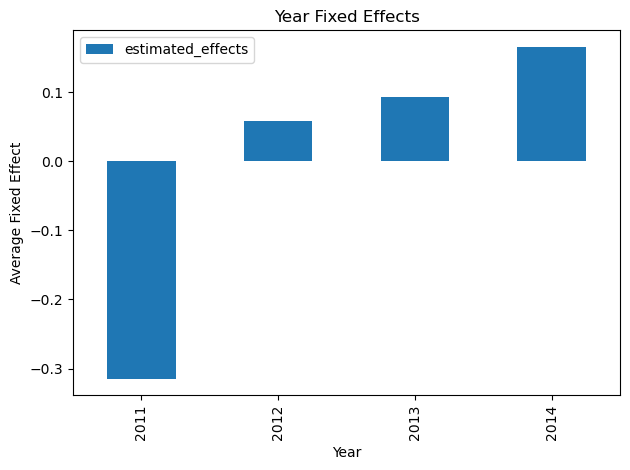

In [179]:
# 2. Year Fixed Effects Bar Chart  
time_effects = result_fe.estimated_effects.groupby(level='year').mean()  

plt.figure(figsize=(10, 6))  
time_effects.plot(kind='bar')  
plt.title('Year Fixed Effects')  
plt.xlabel('Year')  
plt.ylabel('Average Fixed Effect')  
plt.tight_layout()  
plt.show()  

<div style="text-align:center; padding:10px 0;">  
<strong>Figure 5.</strong> Year Fixed Effects of Obesity  
</div>  

### 6.4 Age-Group Interaction Models  

Sample stratification into Reception (4–5 years) and Year 6 (10–11 years) groups (Table [5](#table-5-age-group-panel-models)) shows:  

- No facility or socioeconomic variables are significant in Reception.  
- In Year 6, facility_local_authority retains a significant positive effect (p = 0.0215), and greenspace coverage remains a significant negative influence (p = 0.013). Unemployment remains insignificant.  

Older children’s obesity rates appear more sensitive to environmental facilities and socioeconomic factors.  
 
<a id="table-5-age-group-panel-models"></a>  
<div style="text-align:center; padding:10px 0;">  
<strong>Table 5.</strong> Panel Model Results by Age Group (Reception and Year 6 Combined)  
</div>  

In [128]:
# Define outcome variables by age group  
age_groups = {  
    'Reception': 'obesity_reception',  # 4-5 years old  
    'Year6': 'obesity_year6'           # 10-11 years old  
}  

results_by_age = {}  

for group, outcome in age_groups.items():  
    # Subset data and drop missing values  
    data_sub = panel_data.dropna(subset=[outcome, 'facility_education', 'facility_commercial',  
                                         'facility_local_authority', 'unemployment', 'greenspace_pct', 'ptal'])  
    y = data_sub[outcome]  
    X = sm.add_constant(data_sub[['facility_education', 'facility_commercial', 'facility_local_authority',  
                                  'unemployment', 'greenspace_pct', 'ptal']])  

    # Fit fixed effects panel model  
    model = PanelOLS(y, X, entity_effects=True, time_effects=True)  
    result = model.fit(cov_type='clustered', cluster_entity=True)  
    results_by_age[group] = result  

    print(f"\n===== Panel Results for {group} group =====")  
    print(result.summary.tables[1])  


===== Panel Results for Reception group =====
                                    Parameter Estimates                                     
                          Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------------
const                        14.242     2.0518     6.9412     0.0000      10.218      18.266
facility_education          -0.0620     0.1456    -0.4260     0.6702     -0.3477      0.2236
facility_commercial          0.0834     0.1963     0.4248     0.6710     -0.3016      0.4683
facility_local_authority    -0.3135     0.3575    -0.8767     0.3808     -1.0147      0.3878
unemployment                 0.0004     0.0008     0.5545     0.5793     -0.0011      0.0020
greenspace_pct              -0.0214     0.0243    -0.8791     0.3795     -0.0691      0.0263
ptal                        -0.8847     0.5338    -1.6573     0.0977     -1.9316      0.1623

===== Panel Results fo

## 6.5 SES Interaction Models  

Introducing interactions between facility variables and unemployment (SES) (Table [6](#table-6-ses-interaction-models)) shows no significant interaction effects in either age group, indicating SES does not substantially moderate facility impacts on obesity.  

<a id="table-6-ses-interaction-models"></a>  
<div style="text-align:center; padding:10px 0;">  
<strong>Table 6.</strong> SES Interaction Models Results (Both Age Groups Combined)  
</div>  

In [129]:
results_by_age_ses = {}  

for group_name, outcome_var in age_groups.items():  
    # Prepare data and create SES dummy and interaction terms  
    data = panel_data.dropna(subset=[  
        outcome_var, 'facility_education', 'facility_commercial', 'facility_local_authority',  
        'unemployment', 'greenspace_pct', 'ptal'  
    ]).copy()  

    data['high_ses'] = (data['unemployment'] < data['unemployment'].median()).astype(int)  
    data['edu_x_ses'] = data['facility_education'] * data['high_ses']  
    data['com_x_ses'] = data['facility_commercial'] * data['high_ses']  
    data['local_x_ses'] = data['facility_local_authority'] * data['high_ses']  

    y = data[outcome_var]  
    X = sm.add_constant(data[[  
        'facility_education', 'facility_commercial', 'facility_local_authority',  
        'unemployment', 'greenspace_pct', 'ptal',  
        'edu_x_ses', 'com_x_ses', 'local_x_ses'  
    ]])  

    # Fit fixed effects panel model with clustered SE  
    model = PanelOLS(y, X, entity_effects=True, time_effects=True)  
    result = model.fit(cov_type='clustered', cluster_entity=True)  
    results_by_age_ses[group_name] = result  

    print(f"\n===== SES Interaction Results for {group_name} Group =====")  
    print(result.summary.tables[1])  # Print coefficients table  


===== SES Interaction Results for Reception Group =====
                                    Parameter Estimates                                     
                          Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------------
const                        13.984     2.0549     6.8054     0.0000      9.9537      18.014
facility_education          -0.0632     0.1455    -0.4341     0.6643     -0.3485      0.2222
facility_commercial          0.1040     0.2005     0.5186     0.6041     -0.2893      0.4972
facility_local_authority    -0.3305     0.3902    -0.8471     0.3971     -1.0959      0.4348
unemployment                 0.0005     0.0008     0.6045     0.5456     -0.0011      0.0021
greenspace_pct              -0.0197     0.0243    -0.8092     0.4185     -0.0673      0.0280
ptal                        -0.8701     0.5327    -1.6335     0.1026     -1.9148      0.1747
edu_x_ses    

Overall, facility effects depend on age and type, with local authority facilities notably affecting older children. Socioeconomic and environmental variables, especially greenspace, emerge as robust determinants. Potential reverse causality regarding facilities warrants caution in policy interpretation.  

## 6.6 Residuals and Spatial Fixed Effects Analysis  

Residuals from the panel model are approximately symmetrically distributed around zero, with slight positive skewness (0.087) and moderate kurtosis (1.14) (Figure [5](#figure-5-residuals-qq-plot)). The Q-Q plot shows near-normality with minor tail deviations, and residuals versus fitted values reveal no heteroscedasticity, supporting model validity.  

Spatial mapping of median residuals at ward level indicates geographic clustering, suggesting spatial heterogeneity remains despite covariate and fixed effect controls. 

In [130]:
# Calculate median residuals by ward for spatial plot  
residuals = result_fe.resids  
median_residuals = result.resids.groupby(level='ward_code').median()  
wards_resid_gdf = wards[['GSS_CODE', 'geometry']].rename(columns={'GSS_CODE': 'ward_code'}).merge(  
    pd.DataFrame({'ward_code': median_residuals.index, 'median_residual': median_residuals.values}),  
    on='ward_code')  

# Plot spatial map of median residuals  
wards_gem = wards[['GSS_CODE', 'geometry']] 
wards_gem = wards_gem.rename(columns={'GSS_CODE': 'ward_code'})

vmax = max(abs(wards_resid_gdf['median_residual'].min()), wards_resid_gdf['median_residual'].max())   

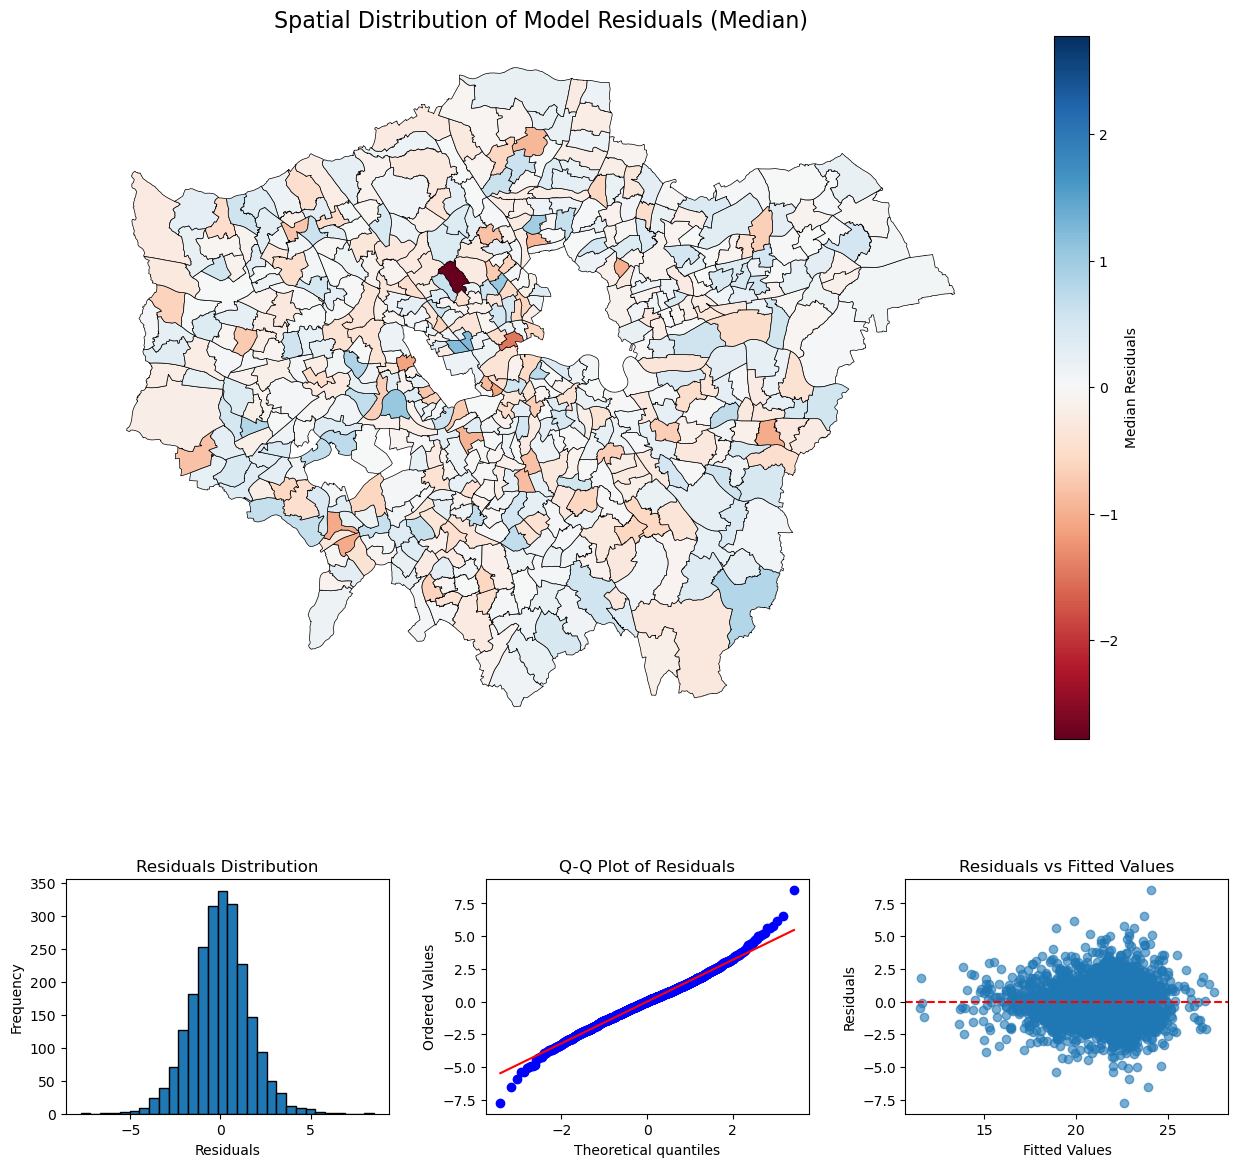

Residuals Summary Statistics:
Mean: 0.000000
Standard Deviation: 1.602410
Skewness: 0.075269
Kurtosis: 1.213215


In [131]:
if vmax < 1e-6:  
    vmax = 1e-6  # Set lower bound threshold for visualization  

# Use GridSpec to control height ratios: map is taller, bottom row shorter  
fig = plt.figure(figsize=(15, 14))  
gs = GridSpec(2, 3, height_ratios=[3, 1], hspace=0.3, wspace=0.3)  

# Spatial residuals map (top, spans all columns)  
ax_map = fig.add_subplot(gs[0, :])  
wards_resid_gdf.plot(  
    column='median_residual',  
    cmap='RdBu',  
    linewidth=0.5,  
    edgecolor='k',  
    legend=True,  
    legend_kwds={'label': 'Median Residuals'},  
    vmin=-vmax,  
    vmax=vmax,  
    ax=ax_map  
)  
ax_map.set_title('Spatial Distribution of Model Residuals (Median)', fontsize=16)  
ax_map.axis('off')  
ax_map.set_aspect('equal')  

# Residual diagnostics plots - three smaller plots in bottom row  
ax_hist = fig.add_subplot(gs[1, 0])  
ax_qq = fig.add_subplot(gs[1, 1])  
ax_scatter = fig.add_subplot(gs[1, 2])  

# 1. Histogram of residuals  
ax_hist.hist(residuals, bins=30, edgecolor='black')  
ax_hist.set_title('Residuals Distribution')  
ax_hist.set_xlabel('Residuals')  
ax_hist.set_ylabel('Frequency')  

# 2. Q-Q plot of residuals  
stats.probplot(residuals, plot=ax_qq)  
ax_qq.set_title('Q-Q Plot of Residuals')  

# 3. Residuals vs fitted values scatter plot  
ax_scatter.scatter(result.fitted_values, residuals, alpha=0.6)  
ax_scatter.axhline(y=0, color='red', linestyle='--')  
ax_scatter.set_title('Residuals vs Fitted Values')  
ax_scatter.set_xlabel('Fitted Values')  
ax_scatter.set_ylabel('Residuals')  

plt.show()  

# Print summary statistics of residuals  
print("Residuals Summary Statistics:")  
print(f"Mean: {np.mean(residuals):.6f}")  
print(f"Standard Deviation: {np.std(residuals):.6f}")  
print(f"Skewness: {stats.skew(residuals):.6f}")  
print(f"Kurtosis: {stats.kurtosis(residuals):.6f}")  

<a id="figure-5-residuals-qq-plot"></a>  
<div style="text-align:center; padding:10px 0;">  
<strong>Figure 5.</strong> Residuals Distribution, Q-Q Plot, and Spatial Mapping of Median Residuals (Combined)  
</div>  

After accounting for spatial heterogeneity via ward-level fixed effects, the model (Figure [6](#figure-6-ward-level-fixed-effects)) reveal substantial unexplained spatial variation in obesity rates, with notably higher effects in northern wards and lower effects in some southern areas.

<Figure size 1200x1000 with 0 Axes>

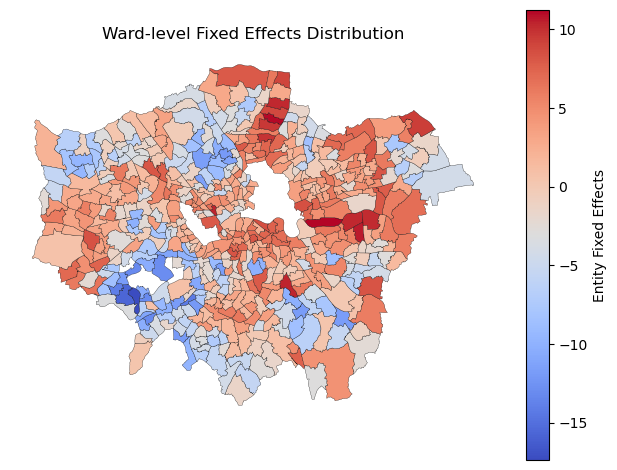

In [173]:
# Extract ward-level fixed effects estimates from model results  
entity_effects = result_fe.estimated_effects  

# Convert MultiIndex to columns for easier processing  
entity_effects_df = entity_effects.reset_index()  

# Aggregate by ward_code to calculate average fixed effect per ward  
entity_effects_grouped = entity_effects_df.groupby('ward_code')['estimated_effects'].mean().reset_index()  

# Merge aggregated fixed effects with ward geometries for mapping  
wards_fe_gdf = wards_gem.merge(entity_effects_grouped, on='ward_code')  

# Plot the spatial distribution of ward-level fixed effects  
plt.figure(figsize=(12, 10))  
wards_fe_gdf.plot(  
    column='estimated_effects',  
    cmap='coolwarm',  
    linewidth=0.2,  
    edgecolor='k',  
    legend=True,  
    legend_kwds={'label': 'Entity Fixed Effects'}  
)  
plt.title('Ward-level Fixed Effects Distribution')  
plt.axis('off')  
plt.tight_layout()  
plt.show()  

<a id="figure-6-ward-level-fixed-effects"></a>  
<div style="text-align:center; padding:10px 0;">  
<strong>Figure 6.</strong> Ward-Level Fixed Effects from Panel Model  
</div>  

Subsequently, a quadrant plot (Figure [7](#figure-7-quadrant-plot-spatial-effects)) combining spatial fixed effects and mean residuals with ward labels demonstrates wards with high spatial effects correspond to higher obesity rates, reflecting strong localized influences captured by the model. 

Residuals are less systematically linked to obesity, as wards with similar residuals show diverse obesity levels, implying other unobserved, possibly non-spatial or softer policy factors. While spatial fixed effects explain much variation, further research into these complex determinants is recommended.  

In [133]:
# Aggregate spatial fixed effects and mean residuals by ward_code  
spatial_effects = result_fe.estimated_effects.groupby(level='ward_code').mean().squeeze()  
median_residuals = result_fe.resids.groupby(level='ward_code').median()  

# Calculate mean obesity rate and get ward names  
obesity_rates = panel_data.groupby('ward_code')['obesity_year6'].mean()  
ward_names = panel_data.groupby('ward_code')['ward_name'].first()  

# Prepare dataframe combining all key variables  
plot_df = pd.DataFrame({  
    'ward_code': spatial_effects.index,  
    'ward_name': ward_names.reindex(spatial_effects.index),  
    'spatial_effects': spatial_effects.values,  
    'median_residuals': median_residuals.reindex(spatial_effects.index).values, 
    'obesity_rate': obesity_rates.reindex(spatial_effects.index).values  
})   

# Define median thresholds to classify quadrants  
med_spatial = plot_df['spatial_effects'].median()  
median_residuals = plot_df['median_residuals'].median()  

def assign_quadrant(row):  
    if row['spatial_effects'] >= med_spatial and row['median_residuals'] >= median_residuals:  
        return 'Q1: High Effect, High Residual'  
    elif row['spatial_effects'] < med_spatial and row['median_residuals'] >= median_residuals:  
        return 'Q2: Low Effect, High Residual'  
    elif row['spatial_effects'] < med_spatial and row['median_residuals'] < median_residuals:  
        return 'Q3: Low Effect, Low Residual'  
    else:  
        return 'Q4: High Effect, Low Residual'  

plot_df['quadrant'] = plot_df.apply(assign_quadrant, axis=1)  

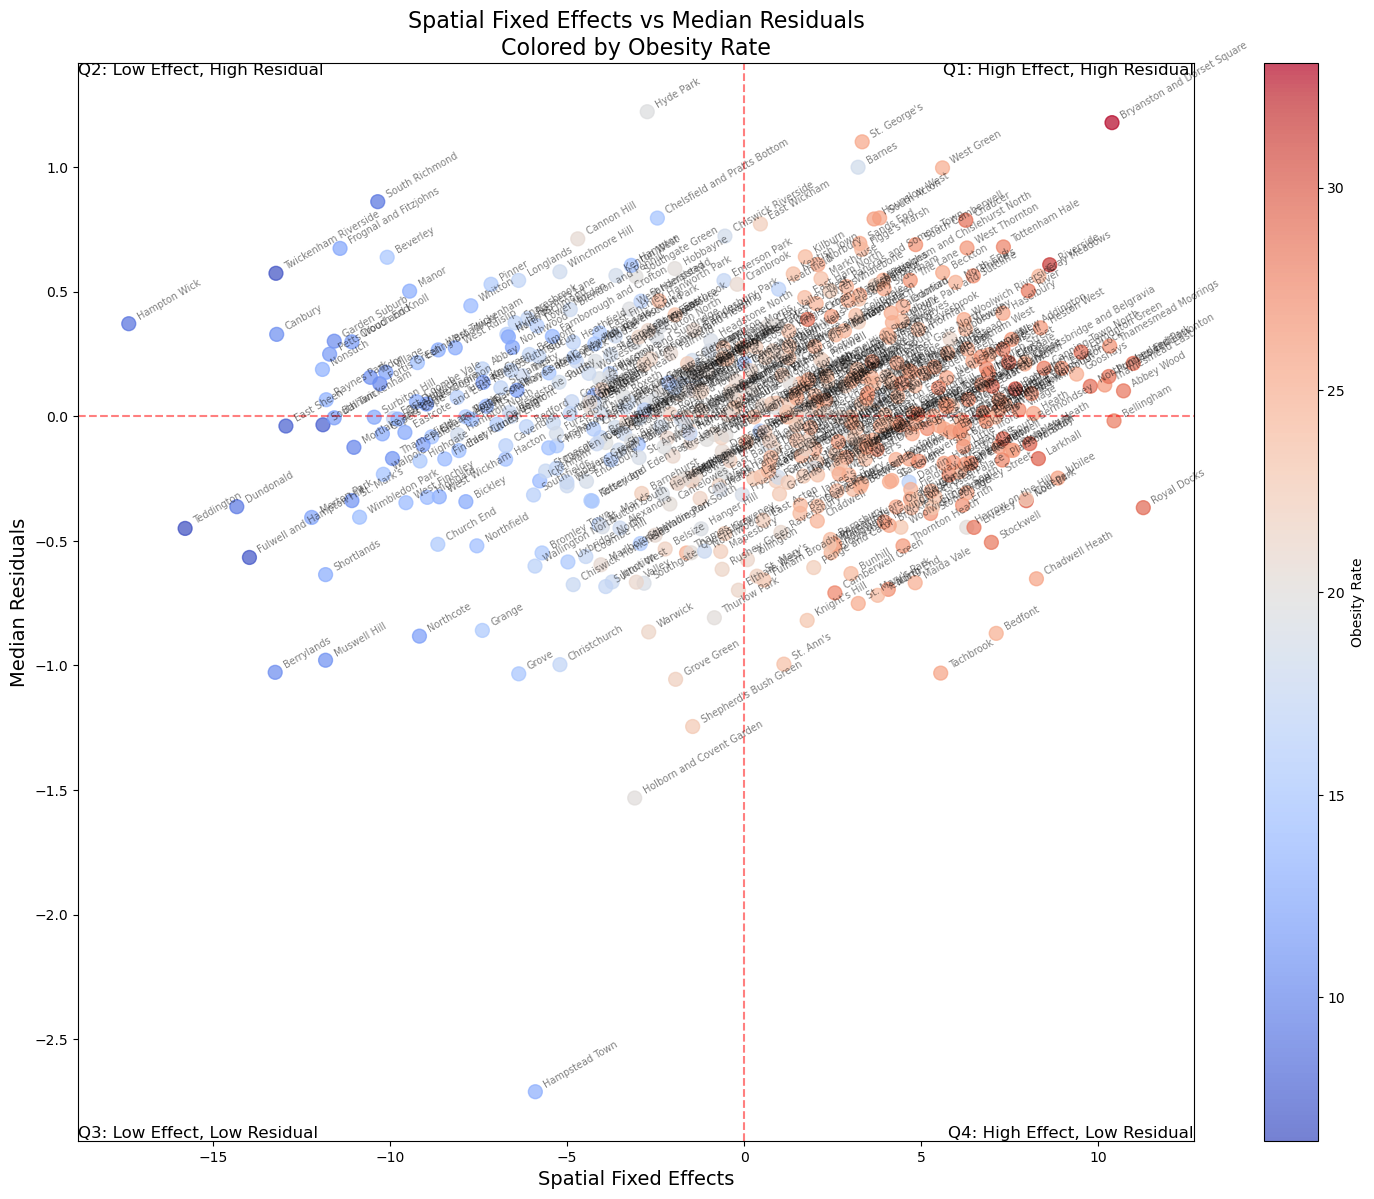

Quadrant Summary:
          Ward Count  obesity_rate  spatial_effects  median_residuals
quadrant                                                             
Q1               144     24.938825         4.549429          0.221822
Q2               140     17.678274        -4.335078          0.196789
Q3               143     17.648077        -4.406520         -0.241363
Q4               140     24.573536         4.141186         -0.168691


In [156]:
plt.figure(figsize=(18, 14))  

# Normalize color by obesity rate  
norm = plt.Normalize(plot_df['obesity_rate'].min(), plot_df['obesity_rate'].max())  
cmap = plt.cm.coolwarm 

# Scatter plot, add tiny jitter to spread points slightly  
jitter_x = np.random.normal(0, 0.05, size=len(plot_df))  
jitter_y = np.random.normal(0, 0.05, size=len(plot_df))  

x_vals = plot_df['spatial_effects'] + jitter_x  
y_vals = plot_df['median_residuals'] + jitter_y 

scatter = plt.scatter(  
    x_vals,  
    y_vals,  
    c=plot_df['obesity_rate'],  
    cmap=cmap,  
    norm=norm,  
    s=100,  
    alpha=0.7  
)  

plt.colorbar(scatter, label='Obesity Rate')  

# Draw quadrant lines  
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)  
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)  

plt.title('Spatial Fixed Effects vs Median Residuals\nColored by Obesity Rate', fontsize=16)  
plt.xlabel('Spatial Fixed Effects', fontsize=14)  
plt.ylabel('Median Residuals', fontsize=14) 

# Quadrant annotations  
plt.text(plt.xlim()[1], plt.ylim()[1], 'Q1: High Effect, High Residual', verticalalignment='top', horizontalalignment='right', fontsize=12)  
plt.text(plt.xlim()[0], plt.ylim()[1], 'Q2: Low Effect, High Residual', verticalalignment='top', horizontalalignment='left', fontsize=12)  
plt.text(plt.xlim()[0], plt.ylim()[0], 'Q3: Low Effect, Low Residual', verticalalignment='bottom', horizontalalignment='left', fontsize=12)  
plt.text(plt.xlim()[1], plt.ylim()[0], 'Q4: High Effect, Low Residual', verticalalignment='bottom', horizontalalignment='right', fontsize=12)  

# Annotate every point with ward_name  
for i, row in plot_df.iterrows():  
    plt.annotate(  
        row['ward_name'],  
        (x_vals[i], y_vals[i]),  
        textcoords='offset points',  
        xytext=(5, 3),  # Slight offset to avoid overlapping the dot  
        fontsize=7,  
        alpha=0.5,  
        rotation=30  
    )  

plot_path = 'plots/spatial_effects_vs_residuals.png'  
plt.savefig(plot_path, dpi=600, bbox_inches='tight')  
plt.show()   

# Quadrant summary, median residuals replacement  
quadrant_summary = plot_df.groupby('quadrant').agg({  
    'ward_code': 'count',  
    'obesity_rate': 'mean',  
    'spatial_effects': 'mean',  
    'median_residuals': 'median' 
}).rename(columns={'ward_code': 'Ward Count'})  

print("Quadrant Summary:")  
print(quadrant_summary)  

<p align="center">  
  <img src="Plots/spatial_effects_vs_residuals.png" alt="Spatial Effects vs Residuals" style="max-width:100%; height:auto;">  
</p>  

<a id="figure-7-quadrant-plot-spatial-effects"></a>  
<div style="text-align:center; padding:10px 0;">  
<strong>Figure 7.</strong> Quadrant Plot: Spatial Fixed Effects and Mean Residuals by Ward  
</div>  

In [167]:
# Assign quadrant labels based on medians of spatial effects and residuals  
def assign_quadrant(row, med_spatial, med_residual):  
    if row['spatial_effects'] >= med_spatial and row['median_residuals'] >= med_residual:  
        return 'Q1'  
    elif row['spatial_effects'] < med_spatial and row['median_residuals'] >= med_residual:  
        return 'Q2'  
    elif row['spatial_effects'] < med_spatial and row['median_residuals'] < med_residual:  
        return 'Q3'  
    else:  
        return 'Q4'  

# Calculate medians  
med_spatial = plot_df['spatial_effects'].median()  
med_residual = plot_df['median_residuals'].median()  

# Apply quadrant assignment  
plot_df['quadrant'] = plot_df.apply(assign_quadrant, axis=1, args=(med_spatial, med_residual))  

# Ensure 'ward_code' columns are string for merging  
plot_df['ward_code'] = plot_df['ward_code'].astype(str)  
wards_gem['ward_code'] = wards_gem['ward_code'].astype(str)  

# Merge quadrant info into geodataframe  
wards_quadrant_gdf = wards_gem.merge(plot_df[['ward_code', 'quadrant']], on='ward_code', how='left')  

# Define color mapping for quadrants 
quadrant_colors = {  
    'Q1': '#c3def1', 
    'Q2': '#e0ebfc',  
    'Q3': '#fde7d8', 
    'Q4': '#fbada3',  
}  

# Map colors and fill missing with light gray  
wards_quadrant_gdf['color'] = wards_quadrant_gdf['quadrant'].map(quadrant_colors).fillna('#d3d3d3')  

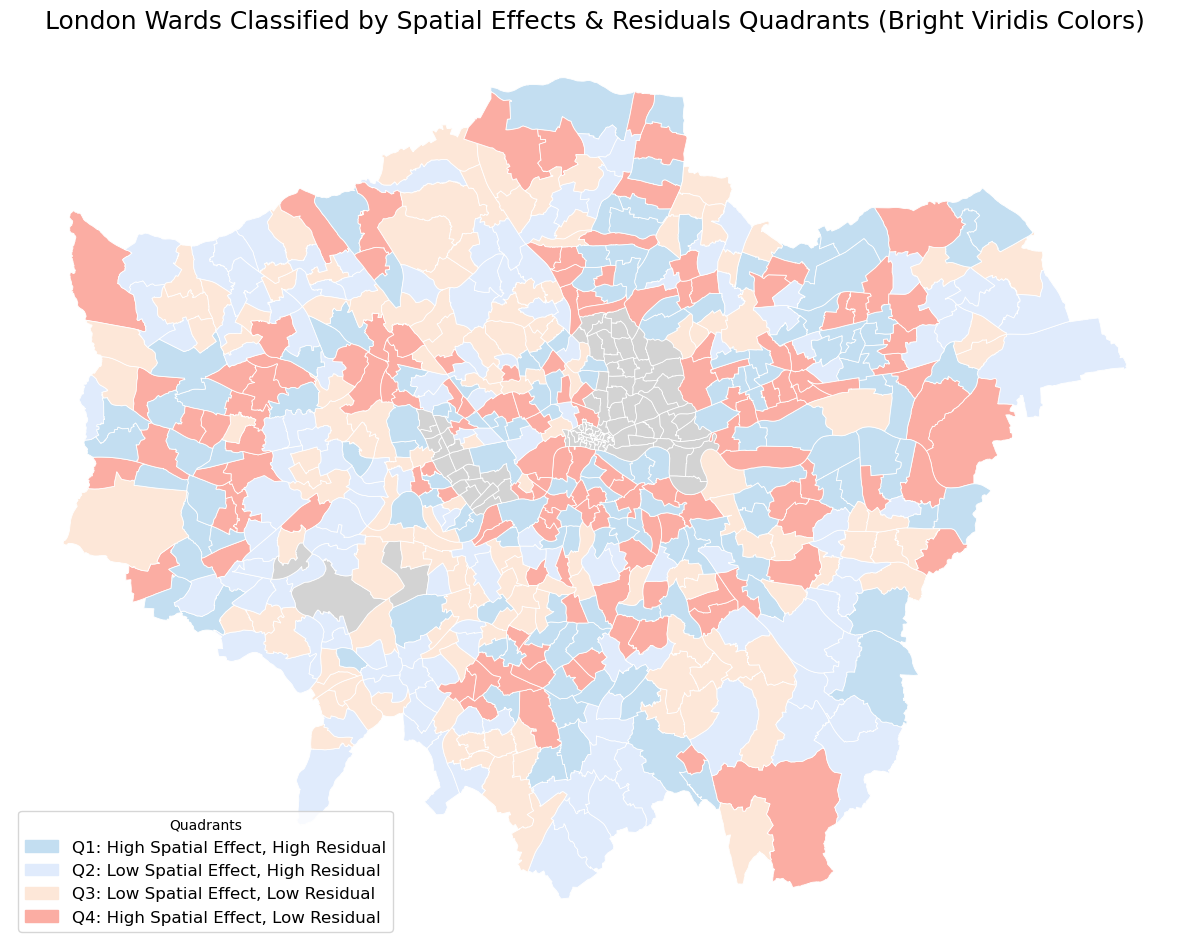

In [168]:
# Plotting  
fig, ax = plt.subplots(figsize=(12, 12))  
wards_quadrant_gdf.plot(color=wards_quadrant_gdf['color'], edgecolor='white', linewidth=0.6, ax=ax)  

# Prepare legend patches  
legend_labels = {  
    'Q1': 'Q1: High Spatial Effect, High Residual',  
    'Q2': 'Q2: Low Spatial Effect, High Residual',  
    'Q3': 'Q3: Low Spatial Effect, Low Residual',  
    'Q4': 'Q4: High Spatial Effect, Low Residual',  
}  
legend_patches = [mpatches.Patch(color=quadrant_colors[q], label=legend_labels[q]) for q in ['Q1','Q2','Q3','Q4']]  

plt.legend(handles=legend_patches, title='Quadrants', loc='lower left', fontsize=12)  
ax.set_title("London Wards Classified by Spatial Effects & Residuals Quadrants", fontsize=18)  
ax.axis('off')  
plt.tight_layout()  
plt.show()  

<a id="figure-8-wards-plot-spatial-effects"></a>  
<div style="text-align:center; padding:10px 0;">  
<strong>Figure 8.</strong> London Wards Classified by Spatial Effects & Residuals Quadrants  
</div>  

## 7. Discussion and Conclusion

[[ go back to the top ]](#Table-of-contents)

By leveraging differnet fixed effects alongside residual analysis, the impact of facilities on childhood obesity shows strong spatial heterogeneity across London wards and varies by age, while socioeconomic status exerts limited influence on this heterogeneity, regarding RQ1.

Consistent with [Wyszyńska et al., 2020](#wyszynska-2020), older children exhibit heightened sensitivity to local facility availability, emphasising the need for age-tailored policies. Although socioeconomic indicators—particularly unemployment—remain key determinants of obesity prevalence, they do not significantly moderate the impact of facility provision. Greenspace emerges as a robust protective factor citywide, whereas the relationship between PTAL and obesity proves inconclusive, indicating complex underlying mechanisms that merit further investigation.  

Spatial analysis, as illustrated in the [quadrant scatter plot](#figure-7-quadrant-plot-spatial-effects) of spatial fixed effects versus median residuals, identifies wards with high obesity risk and limited intervention effects mainly in East London (notably Newham and Tower Hamlets) and parts of South West London. These areas demand integrated strategies extending beyond infrastructure enhancement to encompass behavioural interventions and community engagement - such as school-based nutrition education, family support services, and community. In contrast, Central and West London wards tend to show more favourable outcomes, reflecting the efficacy of current policy measures. Such spatial differentiation underscores the necessity for bespoke, ward-level approaches to optimise resource allocation and promote health equity.  

### Limitations  

- The dataset spans 2009/10 to 2013/14, thus lacking insight into recent social and urban developments.  
- Potential reverse causality between obesity rates and facility investment complicates causal inference.
- Potential reverse causality and selective attrition bias the link between obesity and facility investment, complicating causal inference, which is similar to the pattern of epidemiology [Banack et al., 2019](#banack-2019).
- Absence of individual-level behavioural data limits elucidation of underlying mechanisms.  
- Residual spatial autocorrelation remains unmodelled; future studies should incorporate spatial lag or error models to enhance estimation precision.  

Building upon these findings, policymakers should prioritise facility investments particularly for older children and economically deprived wards, alongside intensifying greenspace provision across London. Employing spatial-temporal risk mapping enables tailored, locality-specific interventions. Future research should extend the temporal horizon, integrate behavioural determinants, and apply advanced spatial econometric techniques to refine causal understanding and optimise intervention outcomes.  

---  



## 8.0 References

[[ go back to the top ]](#Table-of-contents)

<a id="doh-2018"></a>  
Department of Health and Social Care. (2018). _Childhood Obesity: A Plan for Action_. [online] GOV.UK. Available at: https://www.gov.uk/government/publications/childhood-obesity-a-plan-for-action [Accessed 29 Apr. 2025].  

<a id="danielli-2021"></a>Danielli, A., Parker, L. and Swinburn, B., 2021. Systematic review into city interventions to address obesity. *International Journal of Environmental Research and Public Health*, 18(12). Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7910670/ [Accessed 20 Apr 2025].  

<a id="lieb-2009"></a>Lieb, D.C., 2009. Socioeconomic Factors in the Development of Childhood Obesity. *Current Obesity Reports*. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5596457/ [Accessed 20 Apr 2025].  

<a id="phe-2023"></a>Public Health England, 2023. London’s Local Health Profiles. London: Public Health England. Available at: https://fingertips.phe.org.uk/profile/health-profiles/data#page/4/gid/8000073/pat/15/par/E92000001/ati/6/are/E12000007/iid/90323/age/201/sex/4/cat/-1/ctp/-1/yrr/1/cid/4/tbm/1/page-options/car-do-0_tre-ao-0 [Accessed 20 Apr 2025].  

<a id="titis-2023"></a>Titis, E., 2023. Socio-economic correlates of childhood obesity in urban and rural England. *Public Health Nutrition*. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10478054/ [Accessed 20 Apr 2025].  

<a id="wyszynska-2020"></a>Wyszyńska, J., et al., 2020. Physical Activity in the Prevention of Childhood Obesity. *Frontiers in Pediatrics*. Available at: https://www.frontiersin.org/articles/10.3389/fped.2020.535705/full [Accessed 20 Apr 2025].  

<a id="yuan-2024"></a>Yuan, Y., 2024. Public health interventions against childhood obesity in China and globally. *Preventive Medicine Reports*, 29. Available at: https://www.sciencedirect.com/science/article/pii/S2468266724002457 [Accessed 20 Apr 2025].

London Data Store (2011). *Statistical GIS Boundary Files for London*. Available at: [https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london](https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london) (Accessed: 16 April 2025). <a name="lds-boundary"></a>

London Data Store (2023). *Ward Profiles and Atlas*. Available at: [https://data.london.gov.uk/dataset/ward-profiles-and-atlas](https://data.london.gov.uk/dataset/ward-profiles-and-atlas) (Accessed: 16 April 2025). <a name="ward-profiles-atlas"></a>

Office for National Statistics (ONS) (2023). *Ward Level Mid Year Population Estimates (Experimental)*. Available at: [https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/wardlevelmidyearpopulationestimatesexperimental](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/wardlevelmidyearpopulationestimatesexperimental) (Accessed: 16 April 2025). <a name="ons-pop"></a>

Active Places Power (2023). *Active Places Dataset*. Available at: [https://www.activeplacespower.com/pages/downloads](https://www.activeplacespower.com/pages/downloads) (Accessed: 16 April 2025). <a name="active-places-power"></a>

Li, J., Heap, A. D., Potter, A., & Daniell, J. (2014). Spatial interpolation methods applied in the environmental sciences: A review. *Environmental Modelling & Software*, 53, pp.182–190. https://doi.org/10.1016/j.envsoft.2013.12.008 <a name="li-2014"></a>  

<a id="hair-2019"></a>Hair, J. F., Black, W. C., Babin, B. J., & Anderson, R. E. (2019). *Multivariate Data Analysis* (8th Edition). Cengage Learning.  

<a id="nau-2019"></a>Nau, C., Ellis, H., Huang, H., et al. (2019). Associations of multidimensional socioeconomic and built environment factors with body mass index trajectories among youth in geographically heterogeneous communities. *Preventive Medicine Reports*, 15, 100939. https://doi.org/10.1016/j.pmedr.2019.100939  

<a id="walker-et-al-2016"></a>Walker, P. G. T., et al. (2016). Estimating the most efficient allocation of interventions to reduce malaria burden and transmission. *The Lancet Global Health*, 4(7), e474-e484. Available at: [https://www.thelancet.com/journals/langlo/article/PIIS2214-109X(16)30073-0/fulltext](https://www.thelancet.com/journals/langlo/article/PIIS2214-109X(16)30073-0/fulltext) 
 [Accessed 27 April 2025].  

<a id="banack-2019"></a>Banack, H.R., Bea, J.W., Kaufman, J.S., Stokes, A., Kroenke, C.H., Stefanick, M.L., Beresford, S.A., Bird, C.E., Garcia, L., Wallace, R., Wild, R.A., Caan, B. and Wactawski-Wende, J., 2019. The effects of reverse causality and selective attrition on the relationship between body mass index and mortality in postmenopausal women. American Journal of Epidemiology, 188(10), pp.1838–1848. https://doi.org/10.1093/aje/kwz160

In [178]:
%%time  
convert_notebook_to_pdf('24109799_submission_CASA0006.ipynb')  

class HideCodePreprocessor(Preprocessor):  
    """  
    Preprocessor to hide code or output based on cell metadata.  
    
    Usage in notebook:  
    - Add metadata to cell:   
      {"tags": ["hide-code"]} or {"tags": ["hide-output"]}  
    """  
    def preprocess_cell(self, cell, resources, index):  
        # Check cell metadata for hiding instructions  
        tags = cell.metadata.get('tags', [])  
        
        if 'hide-code' in tags and cell.cell_type == 'code':  
            # Add class to hide code  
            cell.cell_type = 'markdown'  
            cell.source = ''  
        
        if 'hide-output' in tags and cell.cell_type == 'code':  
            # Clear outputs for this cell  
            cell.outputs = []  
            cell.metadata['hide_output'] = True  
        
        return cell, resources  

def convert_notebook_to_pdf(  
    notebook_path,   
    output_path=None,   
    hide_code_tags=['hide-code'],  
    hide_output_tags=['hide-output']  
):  
    """  
    Convert Jupyter Notebook to PDF with advanced hiding capabilities.  
    
    Args:  
        notebook_path (str): Path to the notebook file  
        output_path (str, optional): Custom output PDF path  
        hide_code_tags (list): Tags to identify cells with code to hide  
        hide_output_tags (list): Tags to identify cells with output to hide  
    
    Returns:  
        str: Path to the generated PDF file  
    """  
    # Set default output path  
    if output_path is None:  
        output_path = notebook_path.replace('.ipynb', '.pdf')  
    
    # Custom CSS with hiding capabilities  
    css_content = '''  
 
    @page {  
        size: A4;  
        margin: 2cm 1cm 2cm 1cm;  
    }  
    
    body {  
        font-family: Arial, sans-serif;  
        line-height: 1.6;  
        width: 100%;  
        max-width: 660px;  
        margin: 0 0 0 -60px;  
        padding: 20px;  
    }  
    
    .rendered_html {  
        width: 100%;  
        margin: 0;  
        padding: 0;  
    }  
    
    pre {   
        background-color: transparent;
        white-space: pre-wrap; 
        max-width: 100%; 
        overflow-x: auto;   
        border: 1px solid #e0e0e0; 
    }  
    
    table {  
        width: 100%;  
        border-collapse: collapse;  
        margin: 10px 0;  
    }  
    
    code {   
        background-color: #f1f1f1;   
        padding: 2px 2px;   
        border-radius: 1px;   
        font-size: 0.9em; 
        display: inline-block;   
    }  
    
    .input_area, .output_area {  
        width: 100%;  
        overflow-x: auto;  
    }  

    .output_area img {  
    display: block !important;  
    max-width: 100% !important;  
    height: auto !important;  
    visibility: visible !important;  
    opacity: 1 !important;  
} 
    
    /* Hide code block */  
    .hidden-code,  
    .hidden-code pre,  
    .input_area.hidden-code {  
        display: none !important;  
        visibility: hidden;  
        height: 0;  
        width: 0;  
        overflow: hidden;  
    }  
    
    /* Hide output block */  
    .hidden-output,  
    .output_area.hidden-output,  
    .output_area .hidden-output {  
        display: none !important;  
        visibility: hidden;  
        height: 0;  
        width: 0;  
        overflow: hidden;  
    }  
      
    '''  
    
    # Write CSS to file  
    with open('notebook_pdf.css', 'w', encoding='utf-8') as f:  
        f.write(css_content)  
    
    # Configure HTML exporter with custom preprocessor  
    html_exporter = HTMLExporter()  
    html_exporter.template_name = 'classic'  
    html_exporter.register_preprocessor(HideCodePreprocessor, enabled=True)  
    
    # Export notebook to HTML  
    body, _ = html_exporter.from_filename(notebook_path)  
    
    # Generate temporary HTML file  
    html_path = notebook_path.replace('.ipynb', '.html')  
    with open(html_path, 'w', encoding='utf-8') as f:  
        f.write(body)  
    
    # Convert HTML to PDF  
    HTML(html_path).write_pdf(  
        output_path,   
        stylesheets=['notebook_pdf.css']  
    )  
    
    print(f"✅ PDF conversion successful: {output_path}")  
    return output_path  

# Usage example  
convert_notebook_to_pdf('24109799_submission_CASA0006.ipynb')  

✅ PDF conversion successful: 24109799_submission_CASA0006.pdf
✅ PDF conversion successful: 24109799_submission_CASA0006.pdf
CPU times: user 18.1 s, sys: 570 ms, total: 18.6 s
Wall time: 19.5 s


'24109799_submission_CASA0006.pdf'